Read in the output catalogs and make some summary plots showing the SNANA host galaxy sample

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import snhostspec
from glob import glob

Initiliazed an empty WfirstSimData object
45


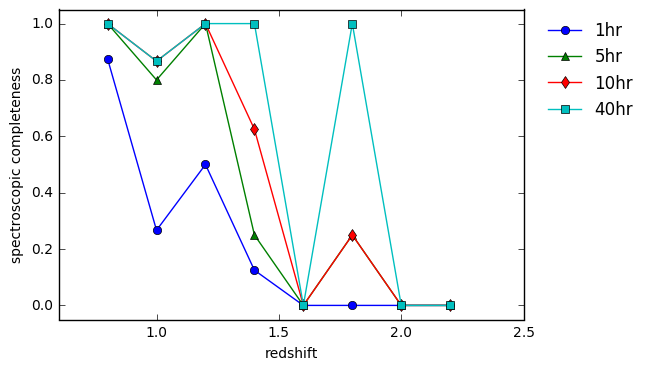

In [20]:
reload(snhostspec)
sim = snhostspec.SnanaSimData()
sim.load_simdata_catalog('/Users/rodney/Dropbox/src/wfirst/wfirst_snhostspec3.cat')
sim.plot_efficiency_curves(dz=0.2)
print(len(sim.simdata))

In [31]:
reload(snhostspec)
etcout = snhostspec.SubaruObsSim('etc.output/subaruPFS_SNR.40hr.000510.dat', 1, 25, 40)
print(etcout.wave_obs.min())
print(etcout.wave_obs.max())

380.066
1259.922


In [24]:
etcout.check_redshift(showplot=False)

Redshift detected. Max S/N=220.7 at rest wave=456 nm


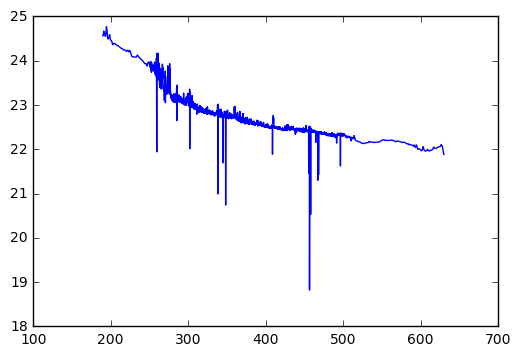

In [32]:
plt.plot(etcout.wave_rest, etcout.mAB)


In [ ]:
# Host galaxy magnitude vs redshift compared to 3DHST
photdat3d = fits.open('3DHST/3dhst_master.phot.v4.1/3dhst_master.phot.v4.1.cat.FITS')
f160 = photdat3d[1].data['f_F160W']
zspec = photdat3d[1].data['z_spec']
zphot = photdat3d[1].data['z_peak']
zbest = np.where(zspec>0, zspec, zphot)
usephot = photdat3d[1].data['use_phot']

ivalid = np.where(((f160>0) & (zbest>0)) & (usephot==1) )[0]
mH3D = -2.5*np.log10(f160[ivalid])+25
z3D = zbest[ivalid]
plt.plot(z3D, mH3D, 'b.', ls=' ', ms=1, alpha=0.1)
#plt.plot(hostz_med, hostmag_med, 'g.', ls=' ', ms=3, alpha=0.3)
plt.plot(hostz_deep, hostmag_deep, 'r.', ls=' ', ms=3, alpha=0.3)
ax = plt.gca()
xlim = ax.set_xlim(0,2.5)
ylim = ax.set_ylim(28,20)
ax.set_xlabel('redshift')
ax.set_ylabel('host galaxy AB magnitude')

Redshift detected. Max S/N=5.8 at rest wave=459 nm


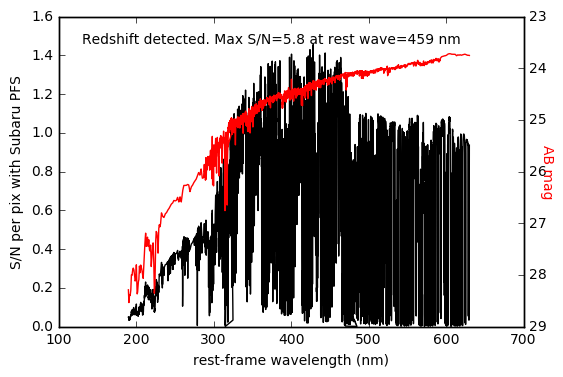

In [56]:
# Examples of some spectrum plots
reload(snhostspec)
# etcoutfilelist = glob('etcout/subaruPFS*dat')
# etcoutfile_random = np.random.choice(etcoutfilelist)
# subarusim = snhostspec.SubaruObsSim(etcoutfile_random)
i=33
etcoutfile = 'etc.output/subaruPFS_SNR.40hr.000{:03d}.dat'.format(i)
subarusim = snhostspec.SubaruObsSim(etcoutfile, 1, 25, 40)
subarusim.check_redshift(snrthresh=4, showplot=False)
subarusim.plot(showspec=True)

In [44]:
np.where(subarusim.wave_rest>350)[0][0]

4939

In [45]:
np.median(subarusim.signaltonoise[4939:7347])

0.79614999999999991

In [46]:
np.median(np.diff(subarusim.wave_obs))

0.077999999999974534

In [53]:
50*0.1

5.0

0.066000000000030923

In [55]:
reload(snhostspec)
sim1 = snhostspec.SnanaSimData()
sim1.load_simdata_catalog('wfirst_snhostspec1.cat')
zcheck = []
etcoutlist=[]
fout = open("/Users/rodney/Dropbox/src/wfirst/wfirst_snhostspec4.cat", 'a')
fout.write(
    "# index zsim magsim zmatch magmatch 1hr 5hr 10hr 40hr SNRbest SNRwave SNRbin\n")
for index in sim1.simdata['index']:
    fout = open("/Users/rodney/Dropbox/src/wfirst/wfirst_snhostspec4.cat", 'a')
    hostgal = sim1.simdata[index]
    etcoutstr = ''
    for et in [1,5,10,40]:
        etcoutfile = 'etc.output/subaruPFS_SNR.{:d}hr.{:06d}.dat'.format(et, index)
        if not os.path.isfile(etcoutfile):
            etcoutstr += '  -1'
            continue
        etcout = snhostspec.SubaruObsSim(
            etcoutfile, hostgal['zmatch'], hostgal['magmatch'], et, verbose=0)
        etcout.check_redshift(snrthresh=4, showplot=False)
        if etcout.redshift_detected:
            etcoutstr += '   1'
        else:
            etcoutstr += '   0'                    
    fout.write('{:6d} {:.2f} {:.2f} {:.2f} {:.2f} {:s} {:.2f} {:.1f} {:d}\n'.format(
               hostgal['index'], hostgal['zsim'], hostgal['magsim'], 
               hostgal['zmatch'], hostgal['magmatch'], 
               etcoutstr, etcout.bestsnr, etcout.bestsnr_waverest, 
               etcout.bestbinsize))
    fout.close()

Initiliazed an empty WfirstSimData object


KeyboardInterrupt: 